# Banglore house peice prediction through machine learning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/Users/Faaiz Anwar/Downloads/banglore.csv')

In [8]:
data.shape

(13320, 9)

In [9]:
data.head

<bound method NDFrame.head of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0 

In [10]:
data.info()# find the missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


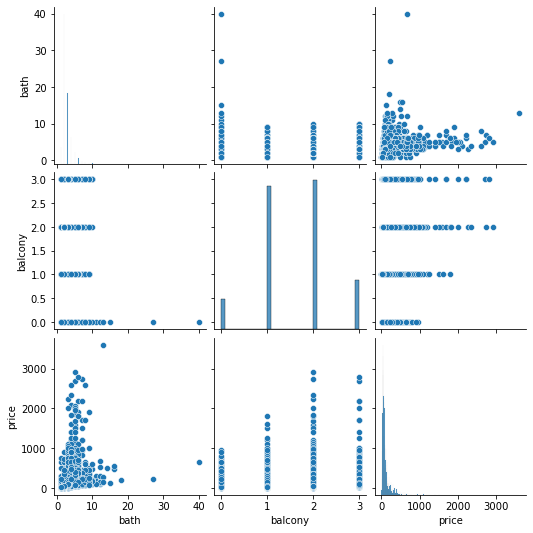

In [12]:
sns.pairplot(data)

bath and price have slightly linear correlation with some outliers

In [13]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [14]:
cat_var = ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']
for i in cat_var:
    print(i,':=>',len(set(data[i])))
    print(data[i].value_counts())
    print('**************************************************************')

area_type :=> 4
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**************************************************************
availability :=> 81
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
16-Nov               1
16-Jul               1
16-Oct               1
15-Jun               1
Name: availability, Length: 81, dtype: int64
**************************************************************
location :=> 1306
Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
Devarabeesana Halli         

# correlation heatmap

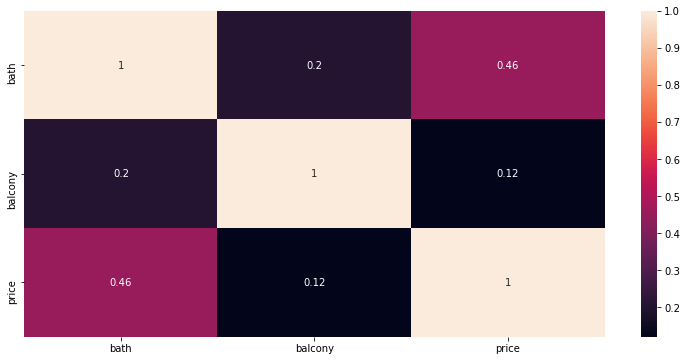

In [15]:
plt.figure(figsize = (13,6))
sns.heatmap(data.corr(), annot = True);

 correlation of bath is greater than a balcony with price

# Data cleaning

finding the missing values

In [16]:
missing_values = data.isnull().sum()[data.isnull().sum()>0]
missing_values.sort_values(ascending = False)

society     5502
balcony      609
bath          73
size          16
location       1
dtype: int64

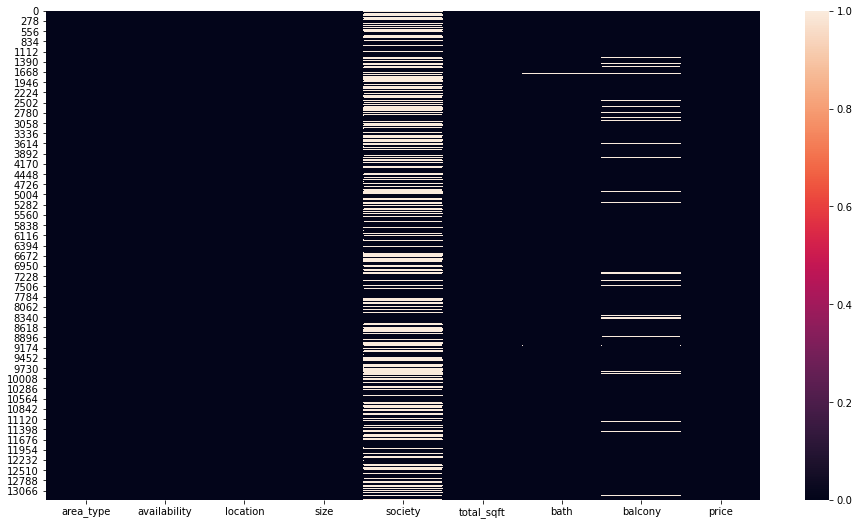

In [17]:
plt.figure(figsize = (16,9))
sns.heatmap(data.isnull());

In [18]:
data.isnull().mean()*100 # % of measing value

#society has 41.3% missing value (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [19]:
data2 = data.drop(columns='society', axis = 1)

In [20]:
data2.shape

(13320, 8)

fill mean value in --------> balcony feature
because it contain 4.5% missing value

In [21]:
data2['balcony'] = data2['balcony'].fillna(data2['balcony'].mean())

In [22]:
missing_values = data2.isnull().sum()[data2.isnull().sum()>0]
missing_values.sort_values(ascending = False)

bath        73
size        16
location     1
dtype: int64

In [23]:
data2['bath'] = data2['bath'].fillna(data2['balcony'].mode()[0])

In [24]:
missing_values = data2.isnull().sum()[data2.isnull().sum()>0]
missing_values.sort_values(ascending = False)

size        16
location     1
dtype: int64

drop na value rows from df2
because there is very less % value missing

In [25]:
data3 = data2.dropna()

In [26]:
data3.shape

(13303, 8)

In [27]:
data4 = data3.copy()

In [28]:
#Creating list of different measures storing converted values of square feet
hyphen = []
yards = []
acres = []
meter = []
perch = []
cents = []
guntha = []
ground = []

#Converting values into average square feet have a range of square feet
for g in data4['total_sqft'][data4['total_sqft'].str.contains('-')]:
  splited_val = g.split('-')
  val_hyphen = float(splited_val[0]) + float(splited_val[1])
  val_hyphen_sqft = val_hyphen/2
  hyphen.append(val_hyphen_sqft)

#Converting values of yard into square feet
for h in data4['total_sqft'][data4['total_sqft'].str.contains('Yards')]:
  splited_val2 = h.split('S')
  val_yards = float(splited_val2[0])
  val_yard_sqft = val_yards*9
  yards.append(val_yard_sqft)

#Converting values of acres into square feet
for i in data4['total_sqft'][data4['total_sqft'].str.contains('Acres')]:
  splited_val3 = i.split('A')
  val_acres = float(splited_val3[0])
  val_acres_sqft = val_acres*43560
  acres.append(val_acres_sqft)

#Converting values of perch into square feet
for j in data4['total_sqft'][data4['total_sqft'].str.contains('Perch')]:
  splited_val4 = j.split('P')
  val_perch = float(splited_val4[0])
  val_perch_sqft = val_perch*272.25
  perch.append(val_perch_sqft)

#Converting values of meter into square feet
for k in data4['total_sqft'][data4['total_sqft'].str.contains('Sq. Meter')]:
  splited_val1 = k.split('S')
  val_meter = float(splited_val1[0])
  val_meter_sqft = val_meter*10.7639
  meter.append(val_meter_sqft)

#Converting values of cents into square feet
for m in data4['total_sqft'][data4['total_sqft'].str.contains('Cents')]:
  splited_val5 = m.split('Ce')
  val_cents = float(splited_val5[0])
  val_cents_sqft = val_cents*435.540069686
  cents.append(val_cents_sqft)

#Converting values of guntha into square feet
for n in data4['total_sqft'][data4['total_sqft'].str.contains('Guntha')]:
  splited_val6 = n.split('Gu')
  val_guntha = float(splited_val6[0])
  val_guntha_sqft = val_guntha*1089.08734481
  guntha.append(val_guntha_sqft)
    
#Converting values of grounds into square feet
for o in data4['total_sqft'][data4['total_sqft'].str.contains('Grounds')]:
  splited_val7 = o.split('Gr')
  val_ground = float(splited_val7[0])
  val_ground_sqft = val_ground*2400
  ground.append(val_ground_sqft)

#Extracting and values have integer and float and converting it into integer
total_sqft_int = data4['total_sqft'][~data4['total_sqft'].str.contains('-') & ~data4['total_sqft'].str.contains('Yards') & ~data4['total_sqft'].str.contains('Acres') & ~data4['total_sqft'].str.contains('Meter') & ~data4['total_sqft'].str.contains('Perch') & ~data4['total_sqft'].str.contains('Cents') & ~data4['total_sqft'].str.contains('Guntha') & ~data4['total_sqft'].str.contains('Grounds')]
total_sqft_int = total_sqft_int.map(float)

total_sqft_df = pd.concat([pd.DataFrame(yards, data4['total_sqft'][data4['total_sqft'].str.contains('Yards')].index),
           pd.DataFrame(acres, data4['total_sqft'][data4['total_sqft'].str.contains('Acres')].index),
           pd.DataFrame(meter, data4['total_sqft'][data4['total_sqft'].str.contains('Sq. Meter')].index),
           pd.DataFrame(perch, data4['total_sqft'][data4['total_sqft'].str.contains('Perch')].index),
           pd.DataFrame(cents, data4['total_sqft'][data4['total_sqft'].str.contains('Cents')].index),
           pd.DataFrame(guntha, data4['total_sqft'][data4['total_sqft'].str.contains('Guntha')].index),
           pd.DataFrame(ground, data4['total_sqft'][data4['total_sqft'].str.contains('Grounds')].index),
           pd.DataFrame(hyphen, data4['total_sqft'][data4['total_sqft'].str.contains('-')].index),
           total_sqft_int],
          axis = 0)
total_sqft_df = total_sqft_df.sort_index(axis=0)

In [29]:
total_sqft_df

,0
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [30]:
data4['total_sqft_new'] = total_sqft_df

In [31]:
data4['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
18 Bedroom       1
43 Bedroom       1
19 BHK           1
16 BHK           1
14 BHK           1
27 BHK           1
12 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [32]:
size = []
for i in data4['size']:
  size.append(i.split(' ')[0])

#Creating new variable size new from size list
data4['size_new'] = size

In [33]:
data4['size_new'] = data4['size_new'].astype(int)

In [34]:
data4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_new,size_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [35]:
data4 = data4.drop(columns = ['total_sqft', 'size'])

In [36]:
data4.head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2


# Feature engineering

In [37]:
data5 = data4.copy()

bath


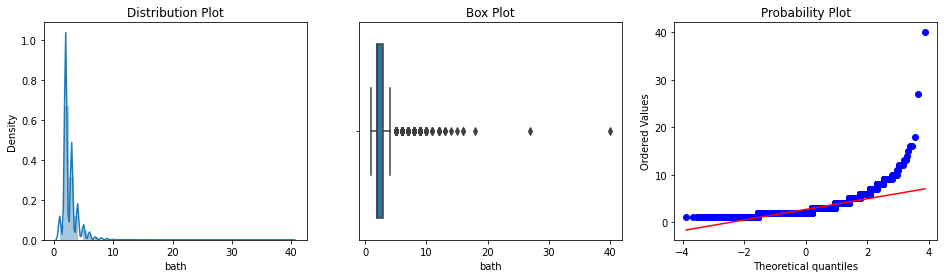

balcony


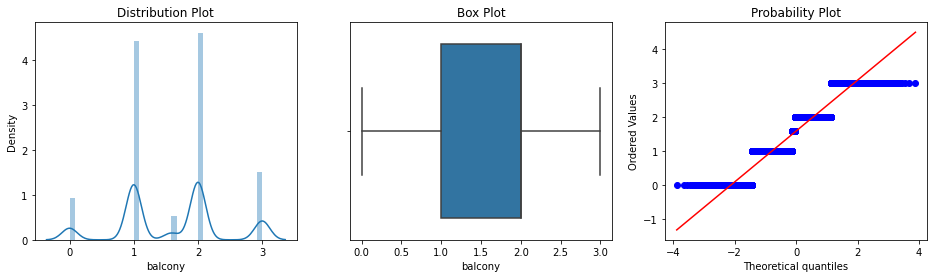

total_sqft_new


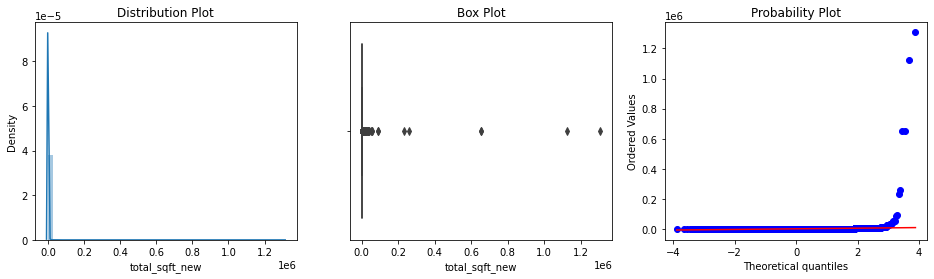

size_new


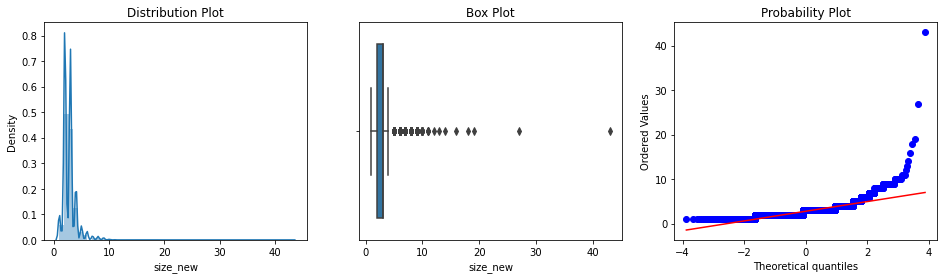

price


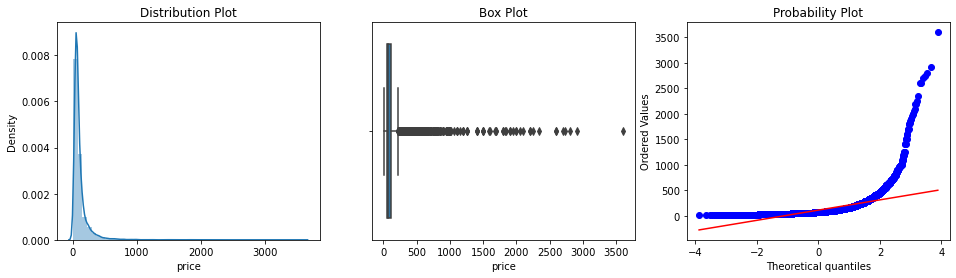

In [38]:
def DIAGNOSTIC_PLOTS(data5, variable):
  plt.figure(figsize=(16,4))
  plt.subplot(1,3,1)
  sns.distplot(data5[variable])
  plt.title('Distribution Plot')
  plt.subplot(1,3,2)
  sns.boxplot(data5[variable])
  plt.title('Box Plot')
  plt.subplot(1,3,3)
  stats.probplot(data5[variable], dist = 'norm', plot = plt)
  plt.show()

var = ['bath', 'balcony', 'total_sqft_new', 'size_new','price']
for i in var:
  print(i)
  DIAGNOSTIC_PLOTS(data5,i)

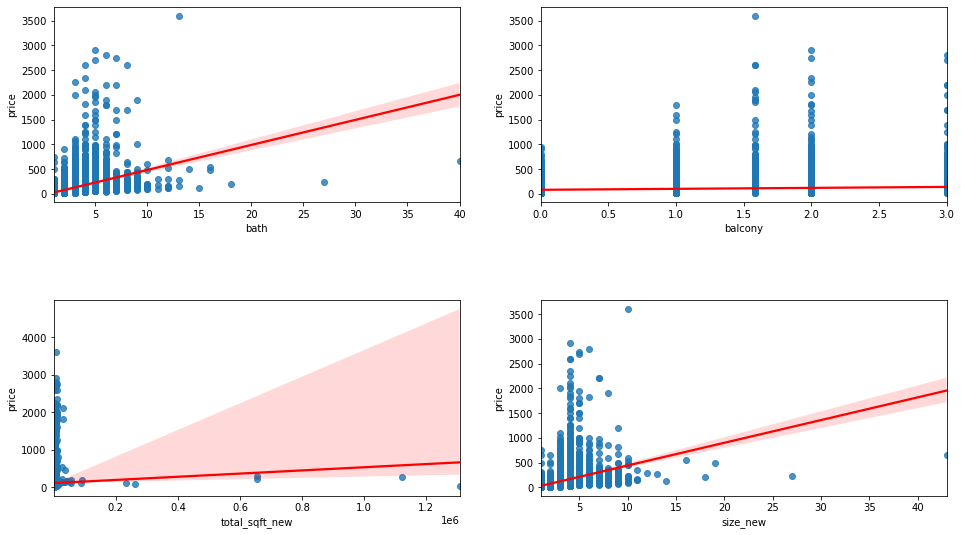

In [39]:
var = ['bath', 'balcony', 'total_sqft_new', 'size_new']

plt.figure(figsize=(16,9))
for i,j in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.regplot(x = data5[j], y=data5['price'], line_kws={'color':'red'});
plt.subplots_adjust(hspace=0.5)

In [40]:
data5[data5['total_sqft_new']/data5['size_new']<350].head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8
58,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6


In [41]:
data6 = data5[~(data5['total_sqft_new']/data5['size_new']<350)]
data6.head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2


In [42]:
data6.shape

(12204, 8)

In [43]:
data6['price_per_sqft'] = data6['price'] / data6['total_sqft_new'] * 100000

In [44]:
data6.head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2,4250.000000


In [45]:
data6['price_per_sqft'].describe()

count     12204.000000
mean       6174.431182
std        4014.446908
min           2.257423
25%        4200.000000
50%        5259.286313
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
mean = np.mean(data6['price_per_sqft'])
std = np.std(data6['price_per_sqft'])
data7 = data6[(data6['price_per_sqft']>(mean-std)) & (data6['price_per_sqft']<=(mean+std))]

In [47]:
data7.reset_index(drop=True)

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2,4250.000000
...,...,...,...,...,...,...,...,...,...
11105,Super built-up Area,Ready To Move,Uttarahalli,2.0,1.0,57.00,1345.0,3,4237.918216
11106,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,112.00,1715.0,3,6530.612245
11107,Built-up Area,Ready To Move,Whitefield,4.0,0.0,231.00,3453.0,5,6689.834926
11108,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1.0,60.00,1141.0,2,5258.545136


In [48]:
data7.shape

(11110, 9)

In [49]:
data8 = data7[data7['bath']<data7['size_new']+2]

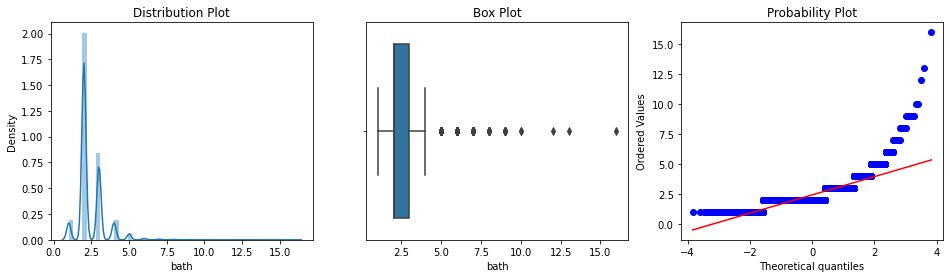

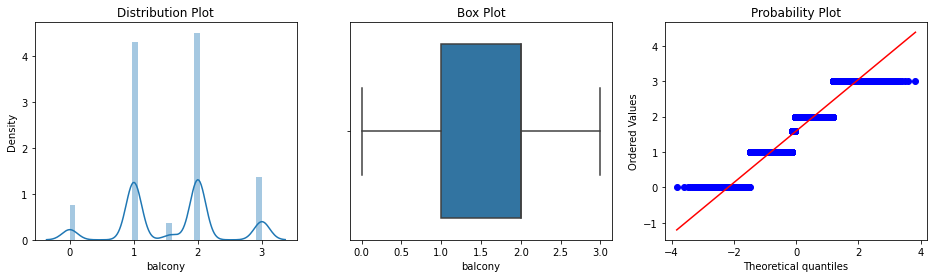

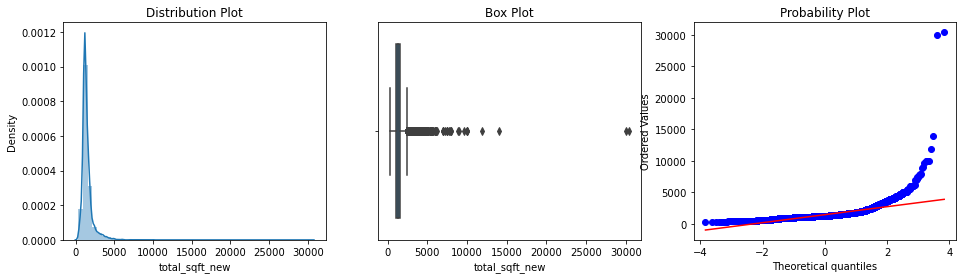

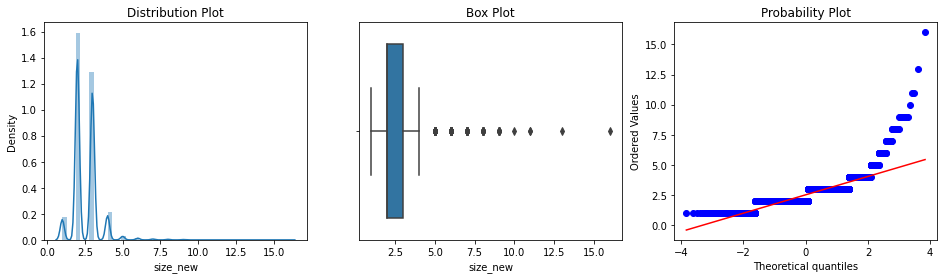

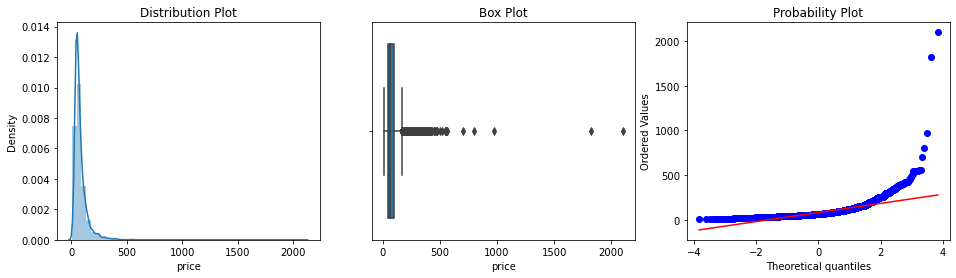

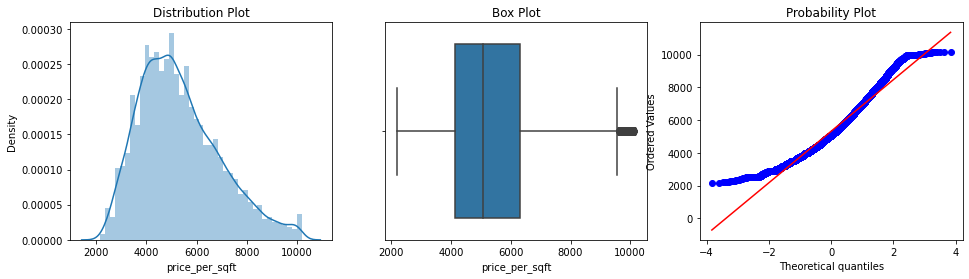

In [50]:
def DIAGNOSTIC_PLOTS(data8, variable):
  plt.figure(figsize=(16,4))
  plt.subplot(1,3,1)
  sns.distplot(data8[variable])
  plt.title('Distribution Plot')
  plt.subplot(1,3,2)
  sns.boxplot(data8[variable])
  plt.title('Box Plot')
  plt.subplot(1,3,3)
  stats.probplot(data8[variable], dist = 'norm', plot = plt)
  plt.show()

var = ['bath', 'balcony', 'total_sqft_new', 'size_new','price', 'price_per_sqft']
for i in var:
  DIAGNOSTIC_PLOTS(data8,i)

In [51]:
data8.head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2,4250.000000


In [52]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
16-Nov               1
16-Jul               1
16-Oct               1
15-Jun               1
Name: availability, Length: 81, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
data8['area_type'] = le.fit_transform(data8['area_type'])
data8['availability'] = le.fit_transform(data8['availability'])
data8['location'] = le.fit_transform(data8['location'])
data8.head()

,area_type,availability,location,bath,balcony,price,total_sqft_new,size_new,price_per_sqft
0,3,38,341,2.0,1.0,39.07,1056.0,2,3699.810606
1,2,77,251,5.0,3.0,120.00,2600.0,4,4615.384615
2,0,77,964,2.0,3.0,62.00,1440.0,3,4305.555556
3,3,77,629,3.0,1.0,95.00,1521.0,3,6245.890861
4,3,77,592,2.0,1.0,51.00,1200.0,2,4250.000000


In [55]:
X = data8.drop(columns = 'price')
y = data8['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [57]:
#Importing regressor from linear model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import ElasticNetCV

#Importing regressor from ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing regressor from others
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#Importing libraries for rmse, cross validation & parameter tuning
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [58]:
def TRAIN_MODEL(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = model.score(x_test, y_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  cv = cross_val_score(model, x_train, y_train, cv=5)
  cv_score = cv.mean()
  return {'Accuracy':accuracy,'RMSE': rmse, 'CV Score': cv_score}

In [59]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
hr = HuberRegressor()
en = ElasticNetCV()
#------------------------------------
rf = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
#------------------------------------
svr = SVR()
dt = DecisionTreeRegressor()

model = [lr, ls, rd, hr, en, rf, etr, gbr, svr, dt]
model_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Huber Regression', 'ElasticNet CV' ,
         'Random Forest Regressor', 'Extra Tree Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor',
         'Decision Tree Regressor']
for i,j in zip(model, model_name):
  print(j,'=>',TRAIN_MODEL(i,X_train, X_test, y_train, y_test))

Linear Regression => {'Accuracy': 0.9547832708569605, 'RMSE': 15.840814786931974, 'CV Score': 0.9528139817051657}
Lasso Regression => {'Accuracy': 0.9521114618686827, 'RMSE': 16.302106811948015, 'CV Score': 0.9520961564907614}
Ridge Regression => {'Accuracy': 0.9547828552769605, 'RMSE': 15.840887582010339, 'CV Score': 0.9528141374295416}
Huber Regression => {'Accuracy': 0.9235703046704153, 'RMSE': 20.59486780442427, 'CV Score': 0.903403628844693}
ElasticNet CV => {'Accuracy': 0.9497558767645804, 'RMSE': 16.698235452935876, 'CV Score': 0.9510870946079679}
Random Forest Regressor => {'Accuracy': 0.9280041834339744, 'RMSE': 19.988563092198035, 'CV Score': 0.9603594143842843}
Extra Tree Regressor => {'Accuracy': 0.9653857643898354, 'RMSE': 13.859747465213166, 'CV Score': 0.9679949383189521}
Gradient Boosting Regressor => {'Accuracy': 0.9786239556050734, 'RMSE': 10.891598308841152, 'CV Score': 0.9695362135964295}
Support Vector Regressor => {'Accuracy': 0.5687664392911702, 'RMSE': 48.919749

In [60]:
np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))

10.891598308841152